In [23]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

import warnings

In [24]:
# initial setup
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 150

plt.style.use('ggplot')
np.random.seed(0)
np.set_printoptions(precision=2, linewidth=100)
warnings.filterwarnings(action='ignore')

# Regression with Regularization

##Generate data 

In [25]:
def f(x):
    return np.cos(1.5 * np.pi * x)

def generate_data(n_samples=30):
    x = np.sort(np.random.rand(n_samples))
    y = f(x) + 0.1 * np.random.randn(n_samples) 
    return x, y

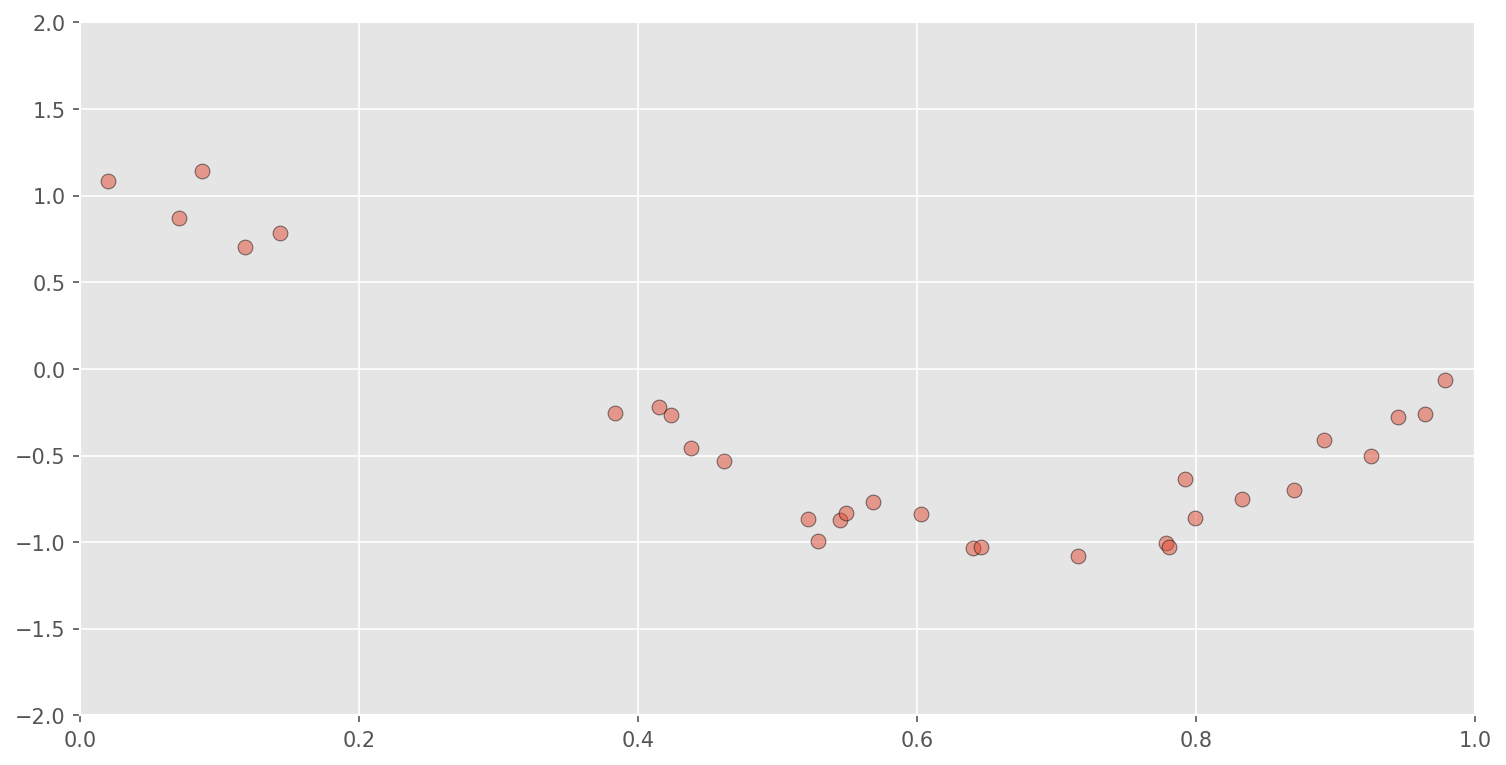

In [26]:
n_samples = 30 # number of data samples
x, y = generate_data(n_samples)

# plot data
plt.figure()
plt.scatter(x, y, s=50, edgecolors='k', alpha=0.5, cmap=plt.cm.coolwarm)
plt.xlim(0, 1)
plt.ylim(-2, 2)
plt.show()

# Polynomial Regression

In [27]:
def fit_poly(x, y, degree=1):
    
    # add polynomial features
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    # create and fit the model
    linear_regression = LinearRegression()
    model = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    model.fit(x[:, None], y)
    return model

In [35]:
degrees = [1, 3, 5, 7, 9, 11, 13, 15]

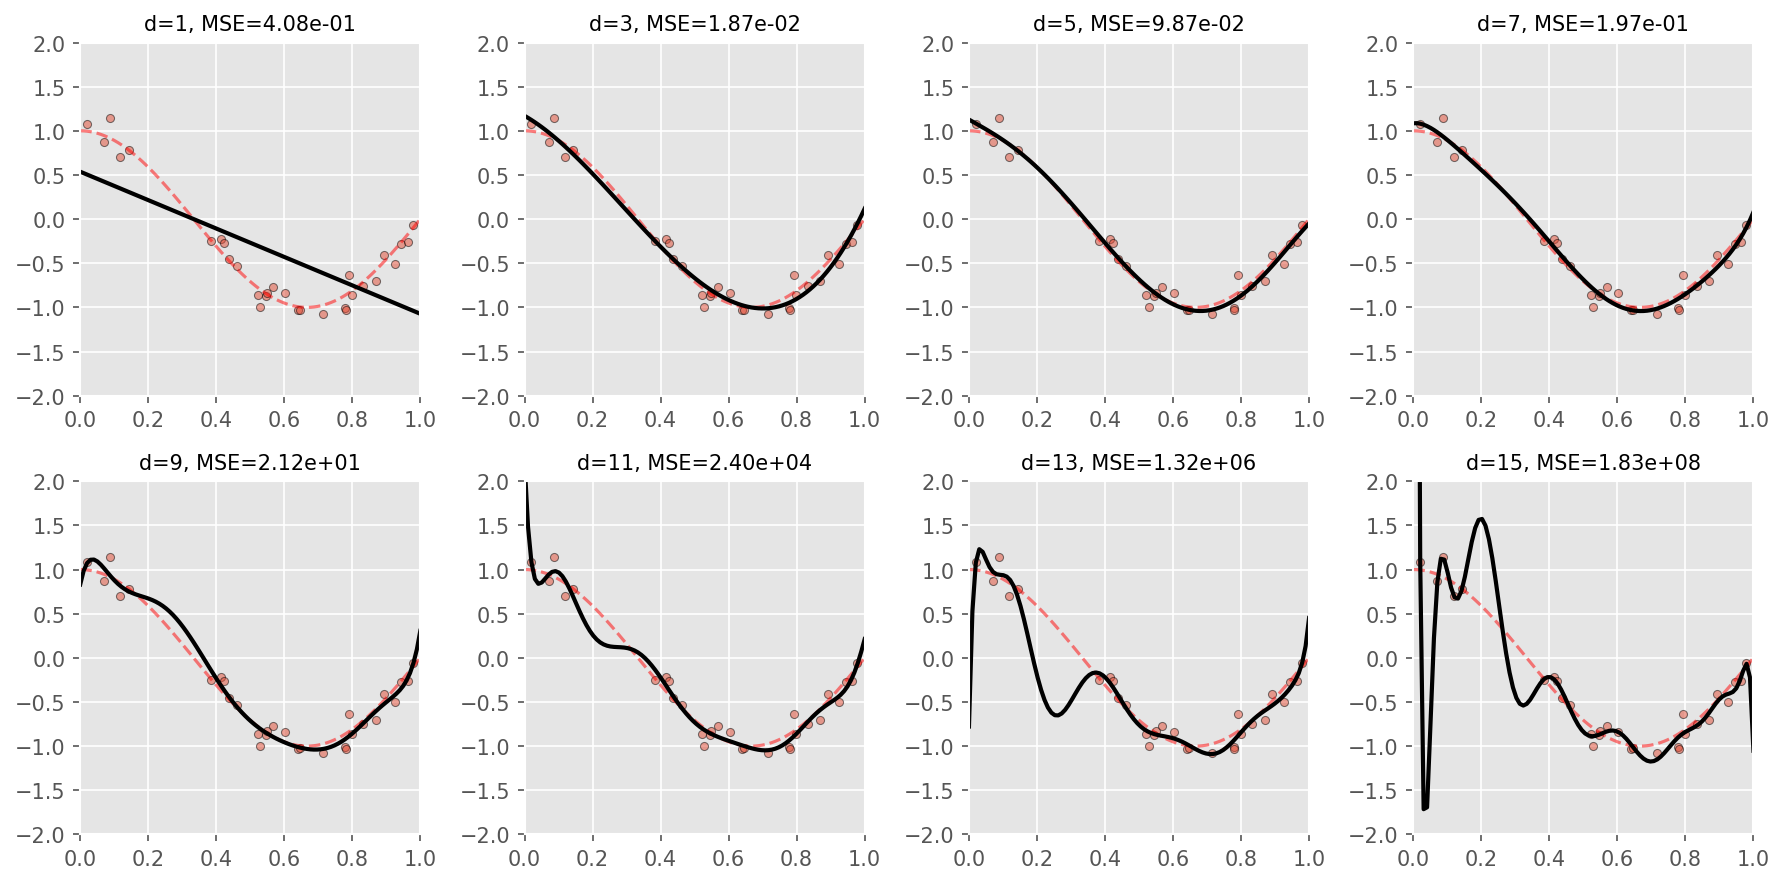

In [36]:
plt.figure()

for d in degrees:
    model = fit_poly(x, y, degree=d)
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)
    
    # plot data and model
    plt.subplot(2, 4, degrees.index(d) + 1)
    plt.tight_layout()
    
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
    plt.scatter(x, y, s=15, edgecolor='k', alpha=0.5, label="Samples")
    plt.plot(x_test, model.predict(x_test[:, None]), 'k', lw=2, label="Predicted")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title("d={}, MSE={:.2e}".format(d, -scores.mean()), fontsize=10)

plt.show()


In [37]:
def plot_coef(theta):
    plt.figure()
    plt.bar(np.arange(1, len(theta) + 1), height=np.abs(theta))
    plt.show()

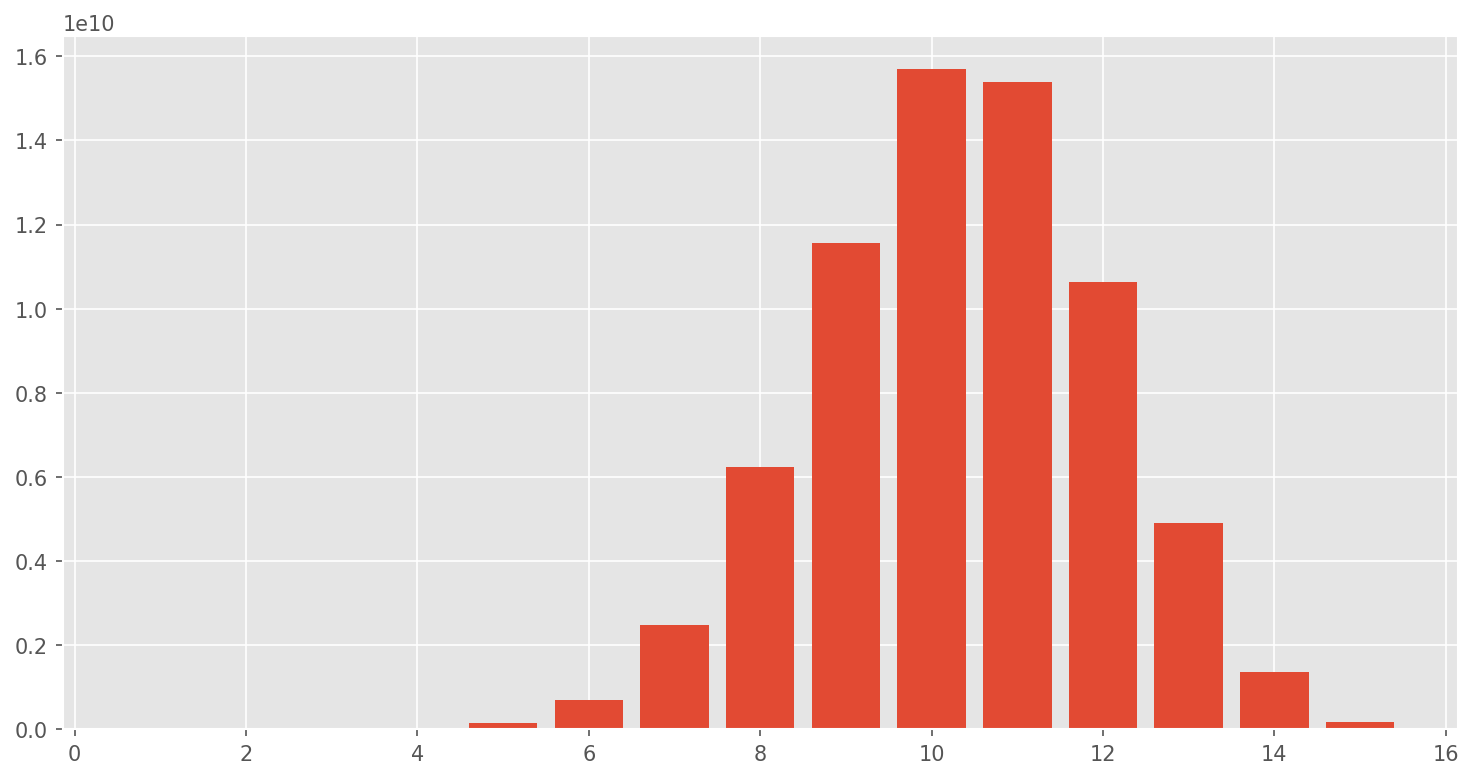

In [38]:
plot_coef(model.steps[1][1].coef_)
# weights of n=15 degree

# L2-Regularizarion (Ridge)

In [33]:
def fit_poly_L2_reg(degree=1, lmbda=1.0):
    # add polynomial features
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    # create and fit the model
    linear_regression = Ridge(alpha=lmbda)
    model = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    model.fit(x[:, None], y)
    return model

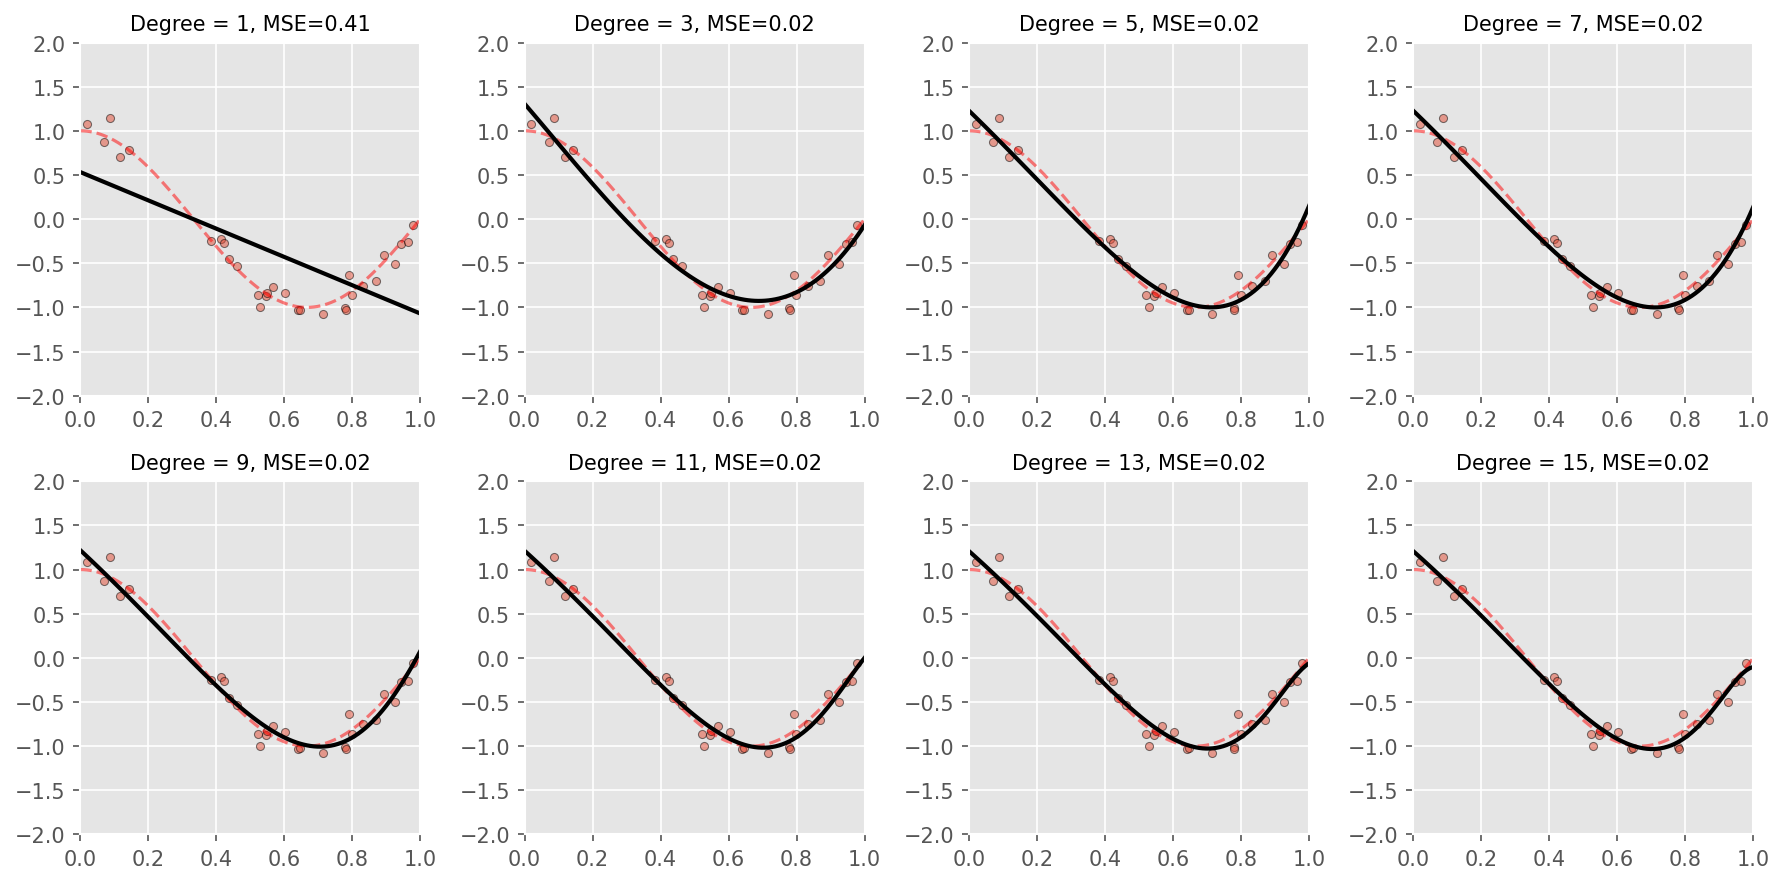

In [39]:
lmbda = 1e-2

plt.figure()

for d in degrees:
    model = fit_poly_L2_reg(degree=d, lmbda=lmbda)
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)
    
    # plot data and model
    plt.subplot(2, 4, degrees.index(d) + 1)
    plt.tight_layout()
    
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
    plt.scatter(x, y, s=15, edgecolor='k', alpha=0.5, label="Samples")
    plt.plot(x_test, model.predict(x_test[:, None]), 'k', lw=2, label="Predicted")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title("Degree = {}, MSE={:.2f}".format(d, -scores.mean()), fontsize=10)

plt.show()

# Visualizing effect of lambda

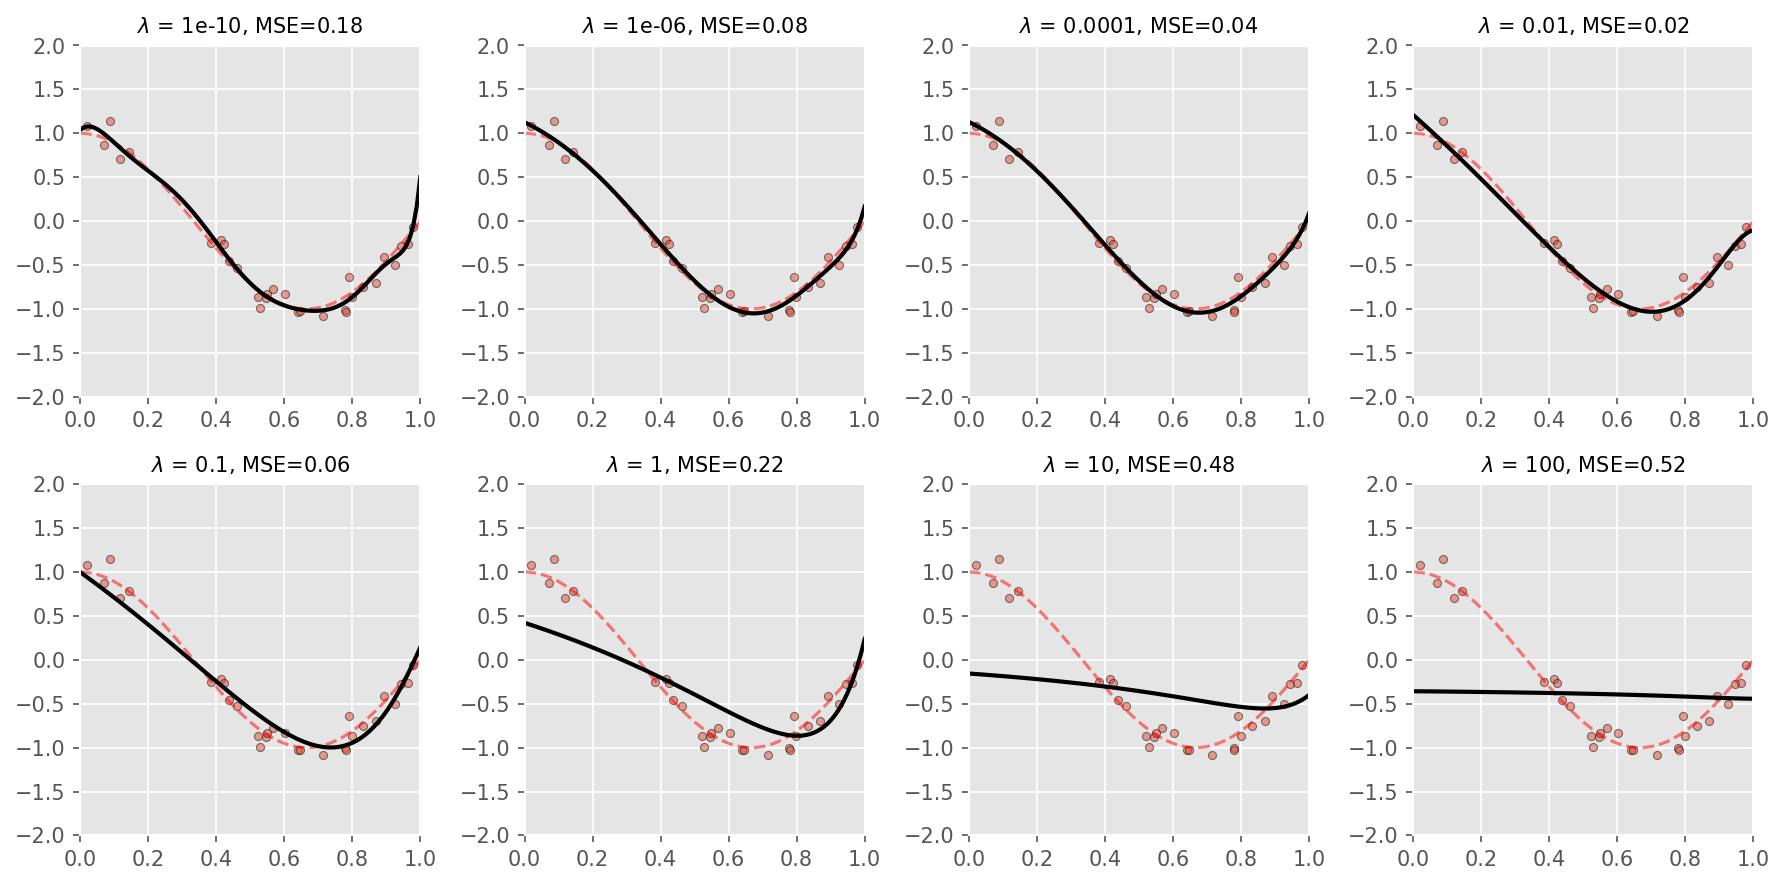

In [40]:
lmbdas = [1e-10, 1e-6, 1e-4, 1e-2, 1e-1, 1, 10, 100]

plt.figure()

for lmbda in lmbdas:
    model = fit_poly_L2_reg(degree=d, lmbda=lmbda)
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)
    
    # plot data and model
    plt.subplot(2, 4, lmbdas.index(lmbda) + 1)
    plt.tight_layout()
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
    plt.scatter(x, y, s=15, edgecolor='k', alpha=0.5, label="Samples")
    plt.plot(x_test, model.predict(x_test[:, None]), 'k', lw=2, label="Predicted")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title("$\lambda$ = {}, MSE={:.2f}".format(lmbda, -scores.mean()), fontsize=10)

plt.show()

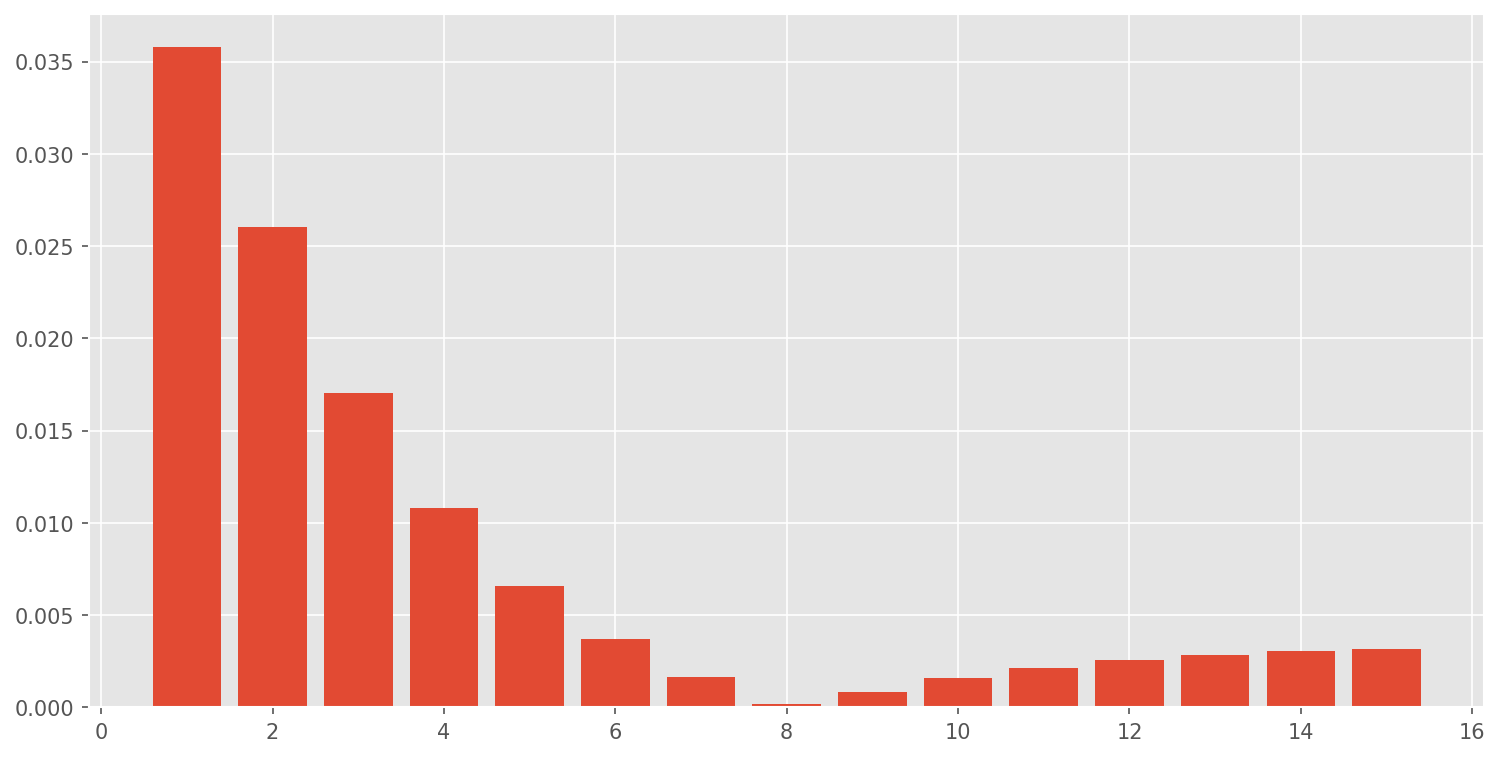

In [41]:
plot_coef(model.steps[1][1].coef_)

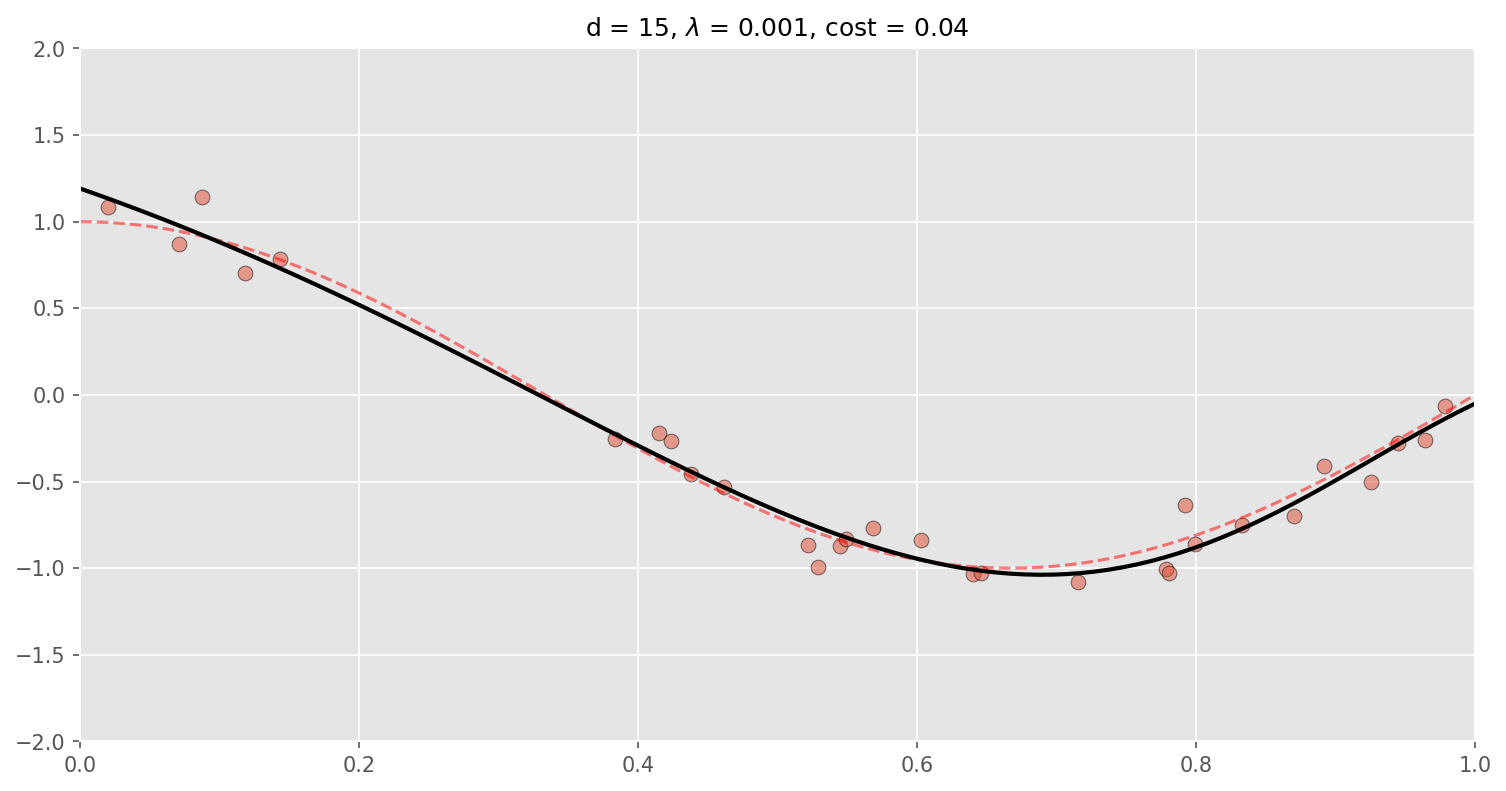

In [42]:
degree = 15
lmbda = 1e-3

# fit
model = fit_poly_L2_reg(degree, lmbda)
scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

# plot
fig, ax = plt.subplots(1)

x_test = np.linspace(0, 1, 100)
ax.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
ax.scatter(x, y, s=50, edgecolor='k', alpha=0.5, label="Samples")
ax.plot(x_test, model.predict(x_test[:, None]), 'k', lw=2, label="Predicted")
ax.set_xlim((0, 1))
ax.set_ylim((-2, 2))
ax.set_title("d = %d, $\lambda$ = %s, cost = %.2f" % (degree, lmbda, -scores.mean()), fontsize=12)
plt.show()

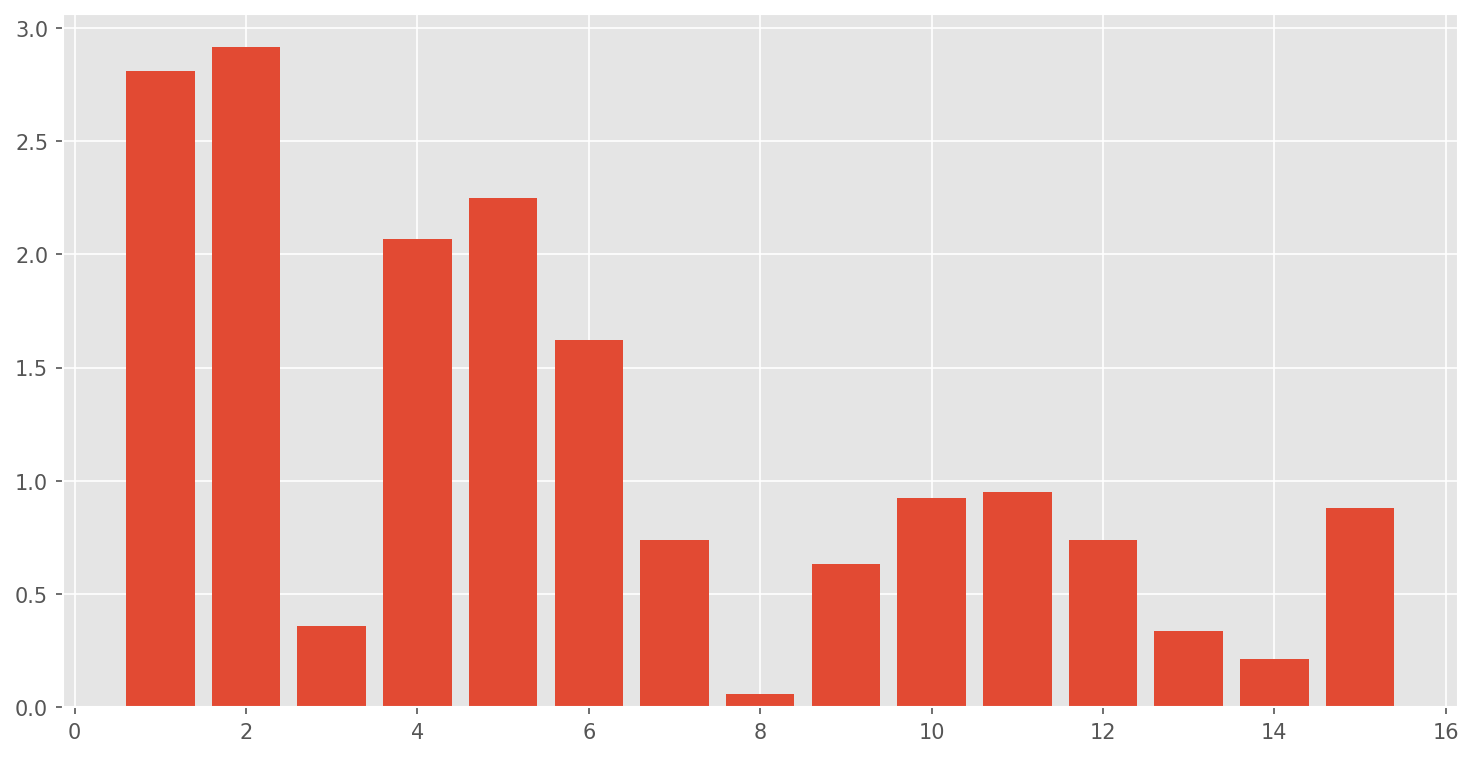

In [43]:
plot_coef(model.steps[1][1].coef_)

# L1-Regularizarion (Lasso)

In [44]:
def fit_poly_L1_reg(degree=1, lmbda=1.0):
    
    # add polynomial features up to degree
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    l1_regression = Lasso(alpha=lmbda)
    model = Pipeline([("poly", polynomial_features), ("l1_reg", l1_regression)])
    
    # create and fit the model
    model.fit(x[:, None], y)
    return model

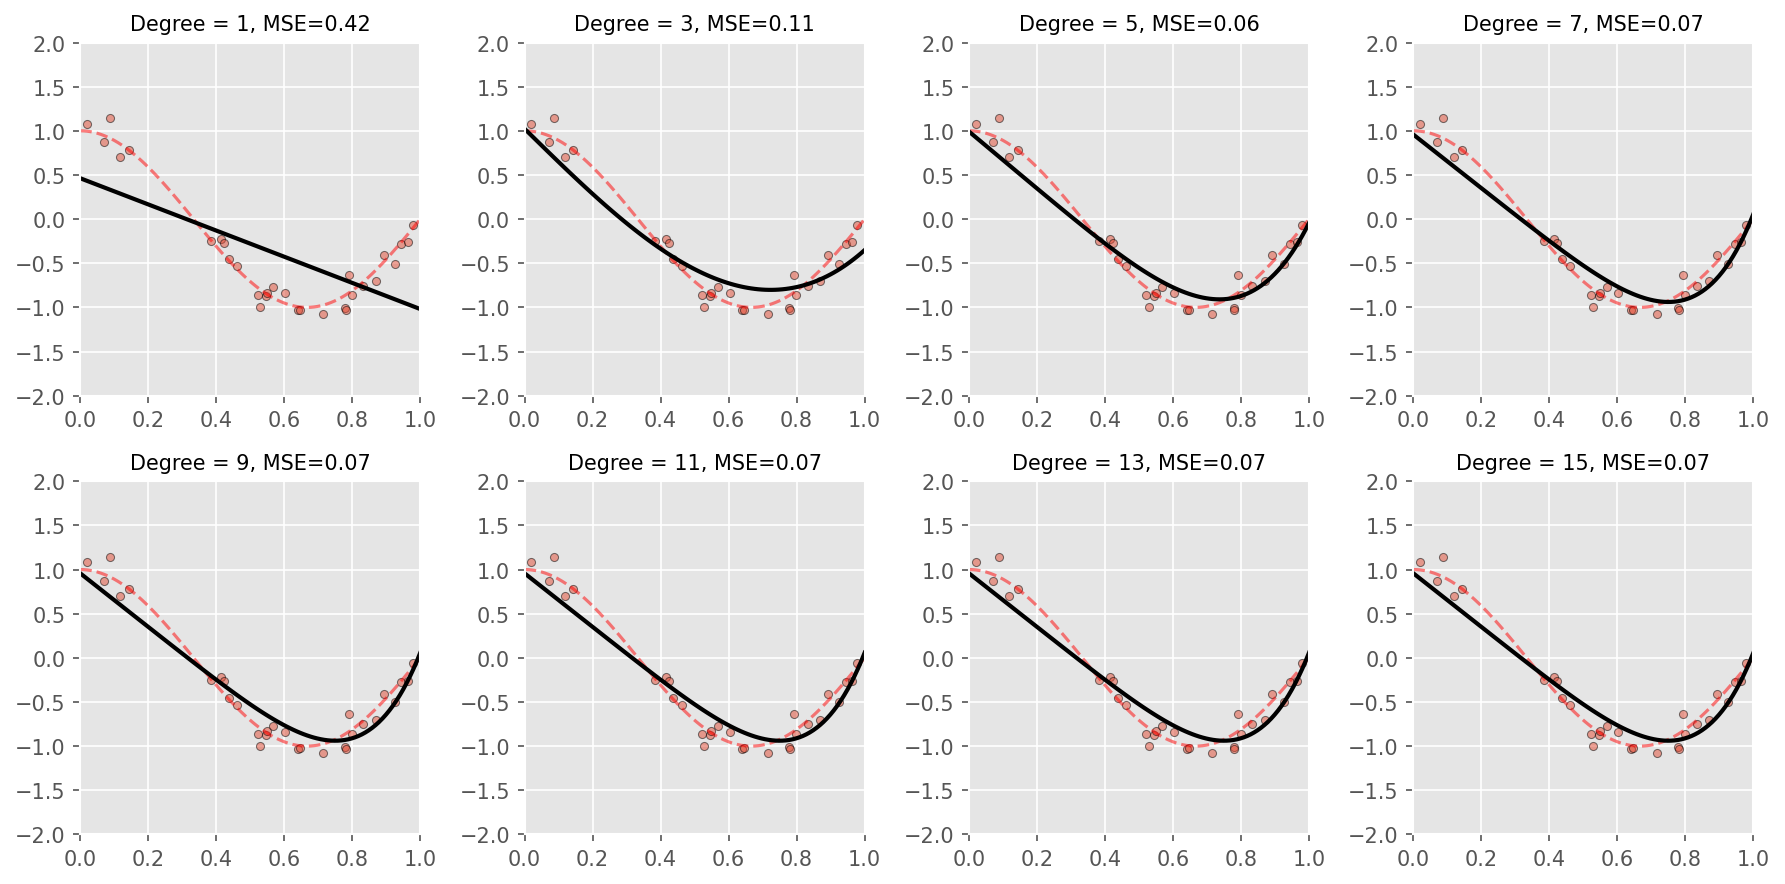

In [45]:
lmbda = 1e-2

plt.figure()

for d in degrees:
    model = fit_poly_L1_reg(degree=d, lmbda=lmbda)
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)
    
    # plot data and model
    plt.subplot(2, 4, degrees.index(d) + 1)
    plt.tight_layout()
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
    plt.scatter(x, y, s=15, edgecolor='k', alpha=0.5, label="Samples")
    plt.plot(x_test, model.predict(x_test[:, None]), 'k', lw=2, label="Predicted")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title("Degree = {}, MSE={:.2f}".format(d, -scores.mean()), fontsize=10)
    
plt.show()

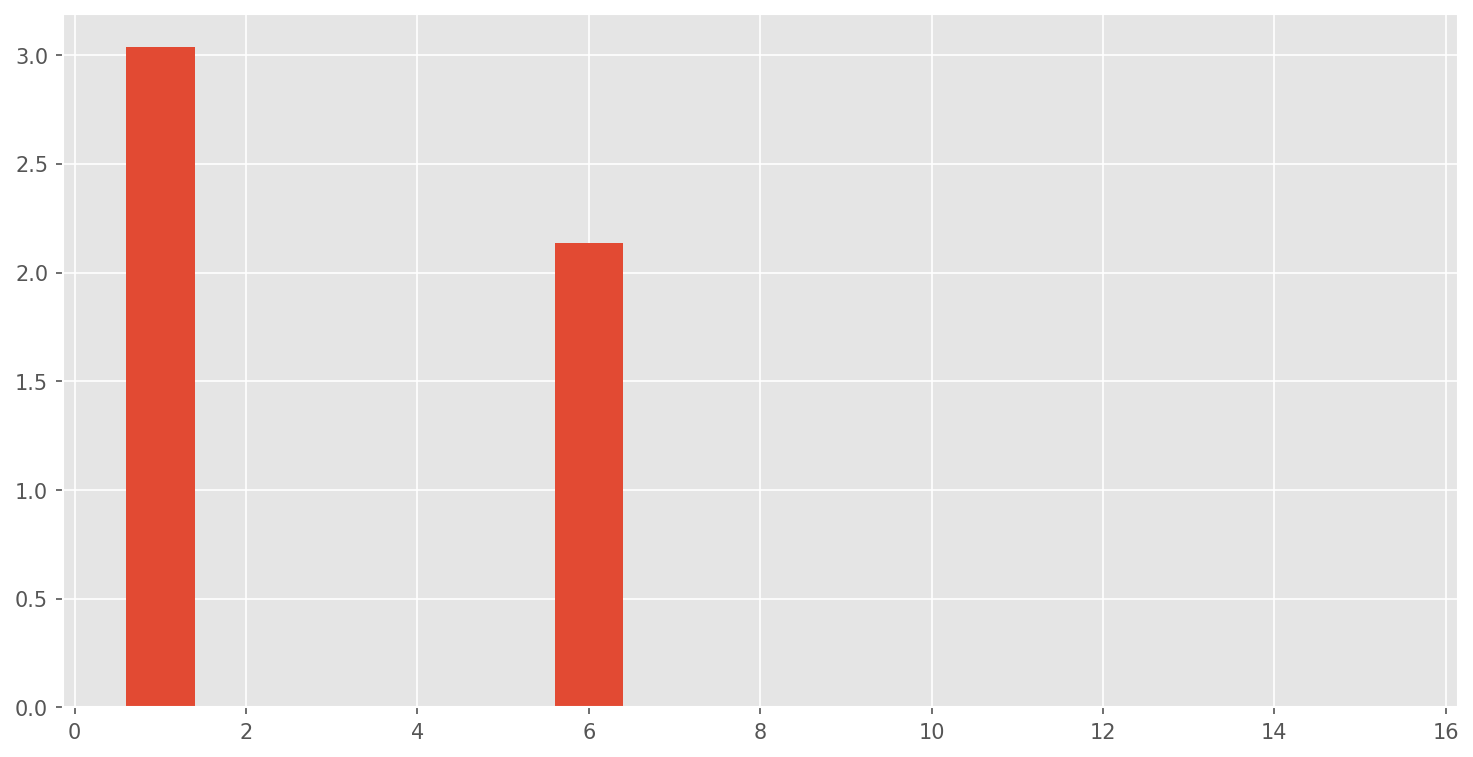

In [46]:
plot_coef(model.steps[1][1].coef_)

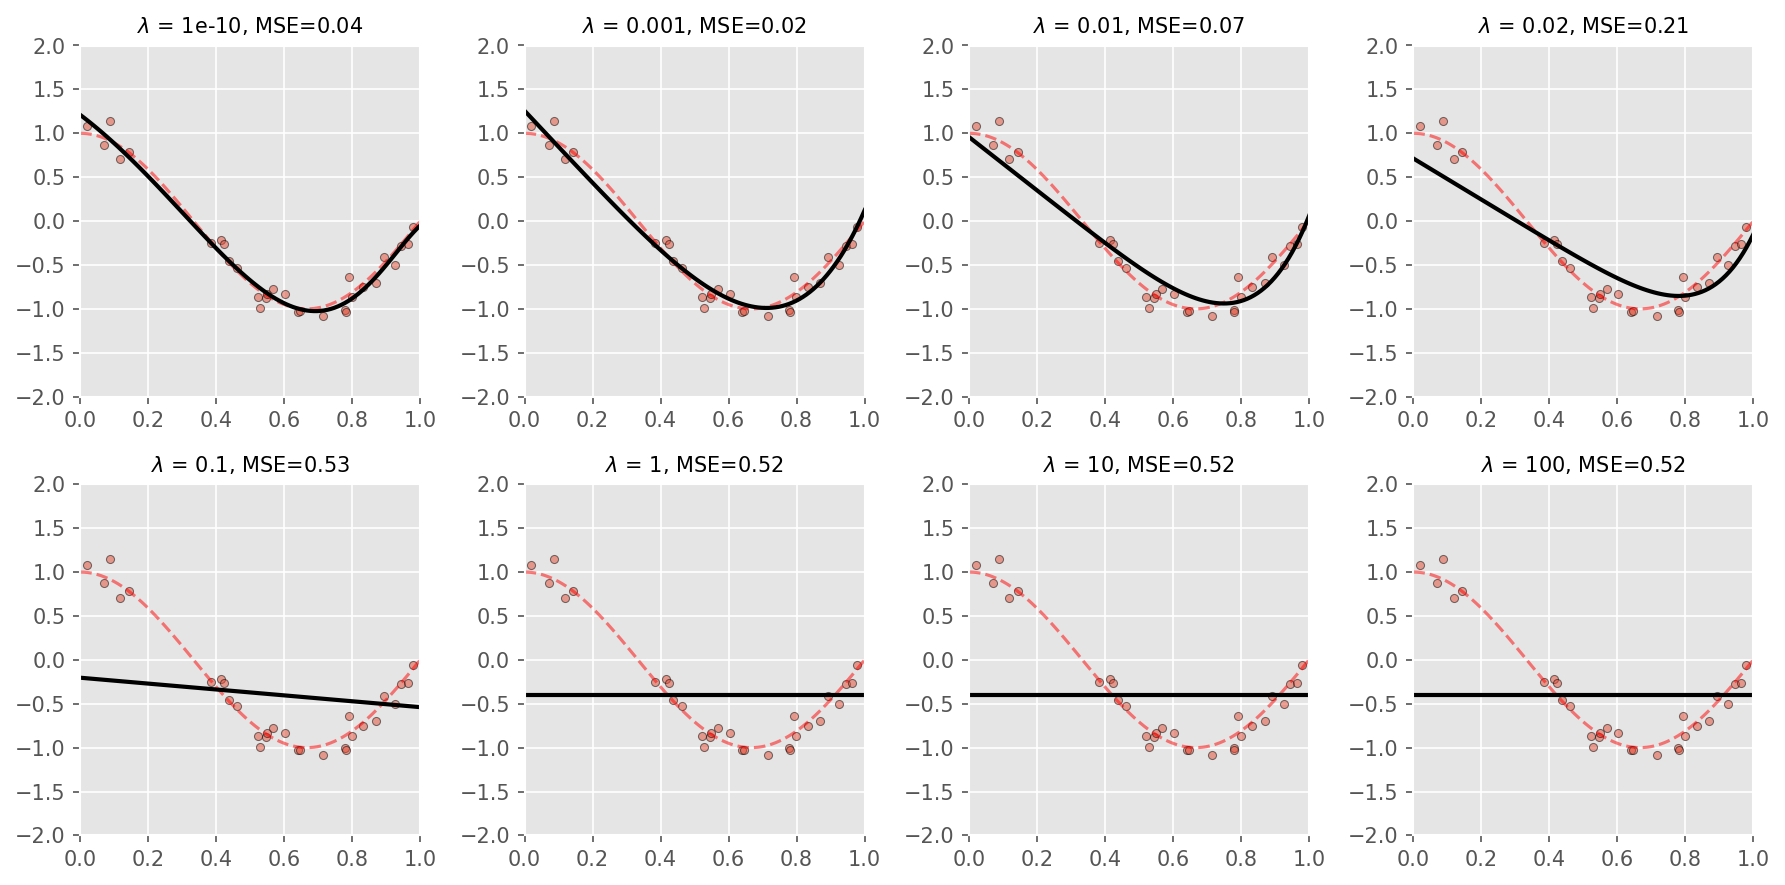

In [47]:
# visulazation of effect of landa
lmbdas = [1e-10, 1e-3, 1e-2, 2e-2, 1e-1, 1, 10, 100]

plt.figure()

for lmbda in lmbdas:
    model = fit_poly_L1_reg(degree=15, lmbda=lmbda)
    
    # plot data and model
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)
    
    # plot data and model
    plt.subplot(2, 4, lmbdas.index(lmbda) + 1)
    plt.tight_layout()
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
    plt.scatter(x, y, s=15, edgecolor='k', alpha=0.5, label="Samples")
    plt.plot(x_test, model.predict(x_test[:, None]), 'k', lw=2, label="Predicted")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title("$\lambda$ = {}, MSE={:.2f}".format(lmbda, -scores.mean()), fontsize=10)

plt.show()

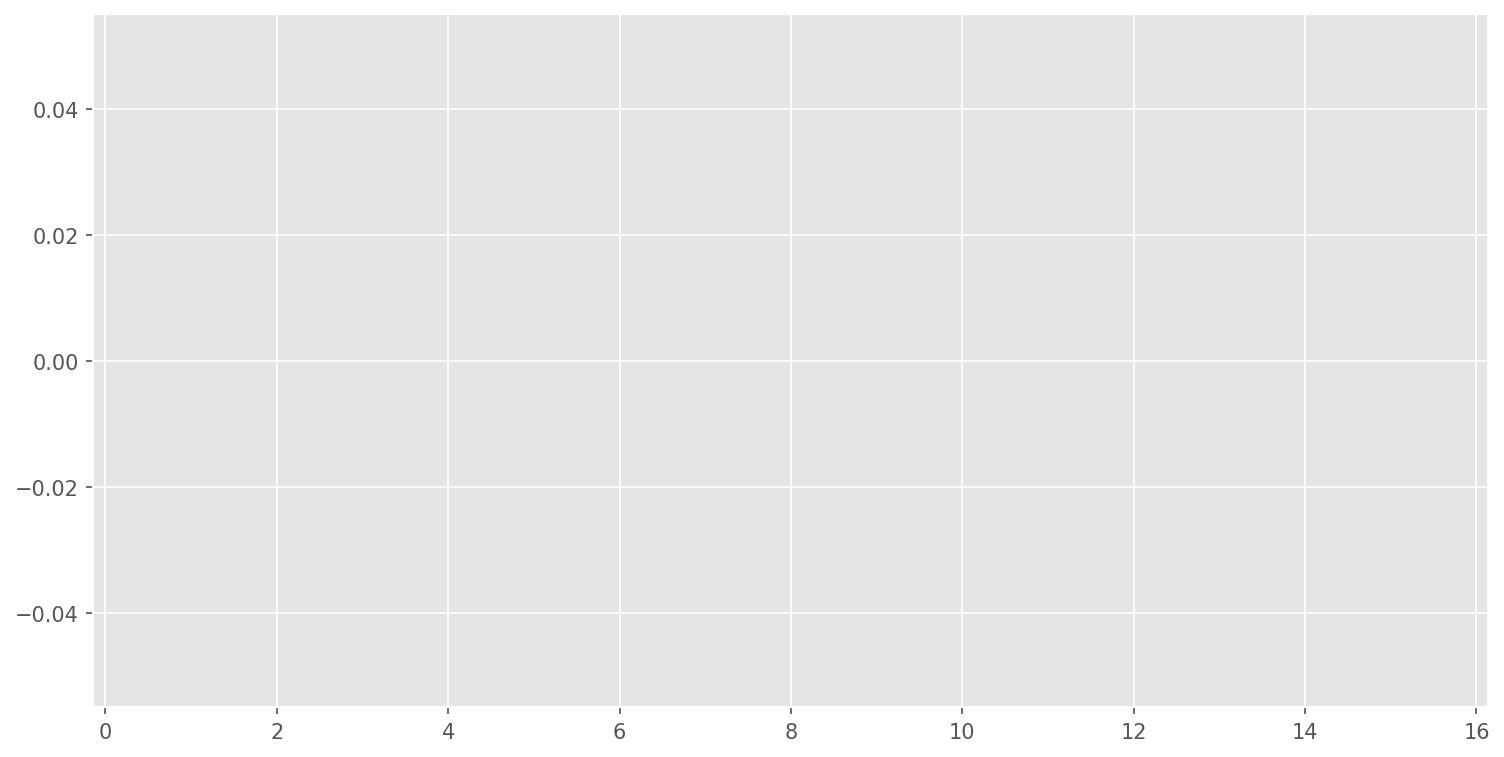

In [48]:
plot_coef(model.steps[1][1].coef_)

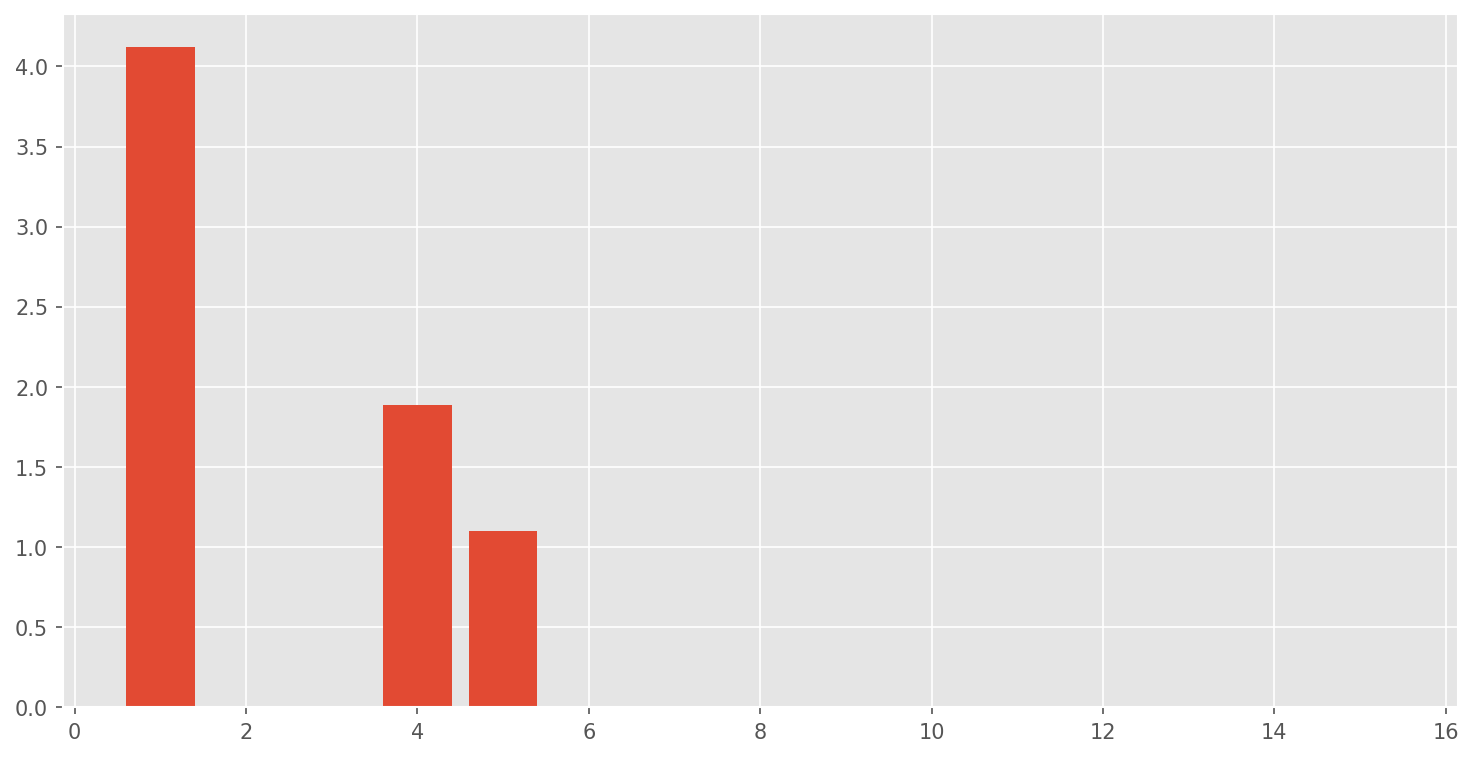

In [49]:
model = fit_poly_L1_reg(degree=15, lmbda=0.001)
plot_coef(model.steps[1][1].coef_)

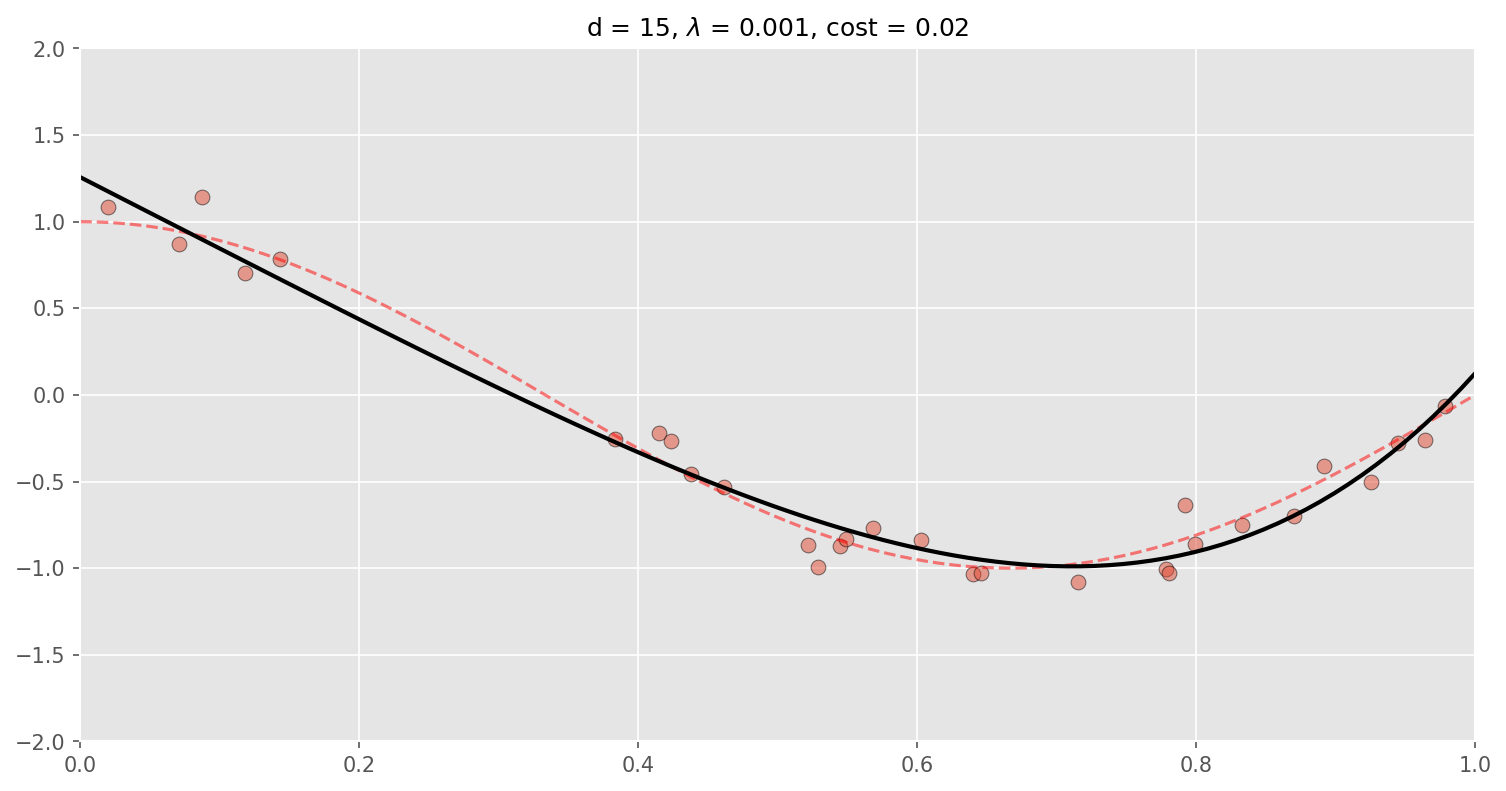

In [50]:
degree = 15
lmbda = 1e-3

# fit
model = fit_poly_L1_reg(degree=degree, lmbda=lmbda)
scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

# plot
fig, ax = plt.subplots(1)
x_test = np.linspace(0, 1, 100)
ax.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
ax.scatter(x, y, s=50, edgecolor='k', alpha=0.5, label="Samples")
ax.plot(x_test, model.predict(x_test[:, None]), 'k', lw=2, label="Predicted")
ax.set_xlim((0, 1))
ax.set_ylim((-2, 2))
ax.set_title("d = %d, $\lambda$ = %s, cost = %.2f" % (degree, lmbda, -scores.mean()), fontsize=12)
plt.show()

# Classification with Regularization

In [55]:
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression



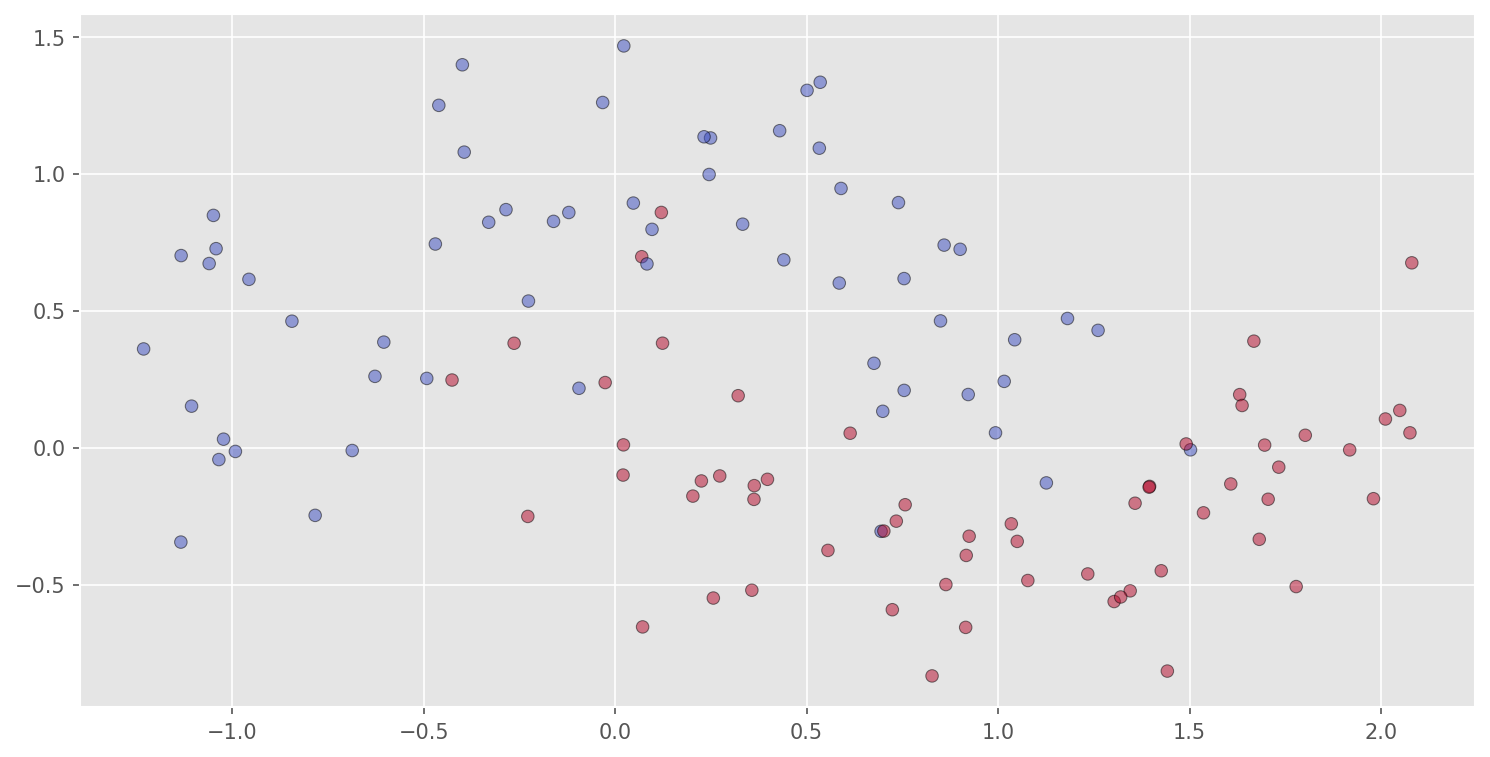

In [56]:
# create random data
X, y = make_moons(n_samples=120, noise=0.25, random_state=0)

# plot data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, edgecolors='k', cmap=plt.cm.coolwarm)
plt.show()

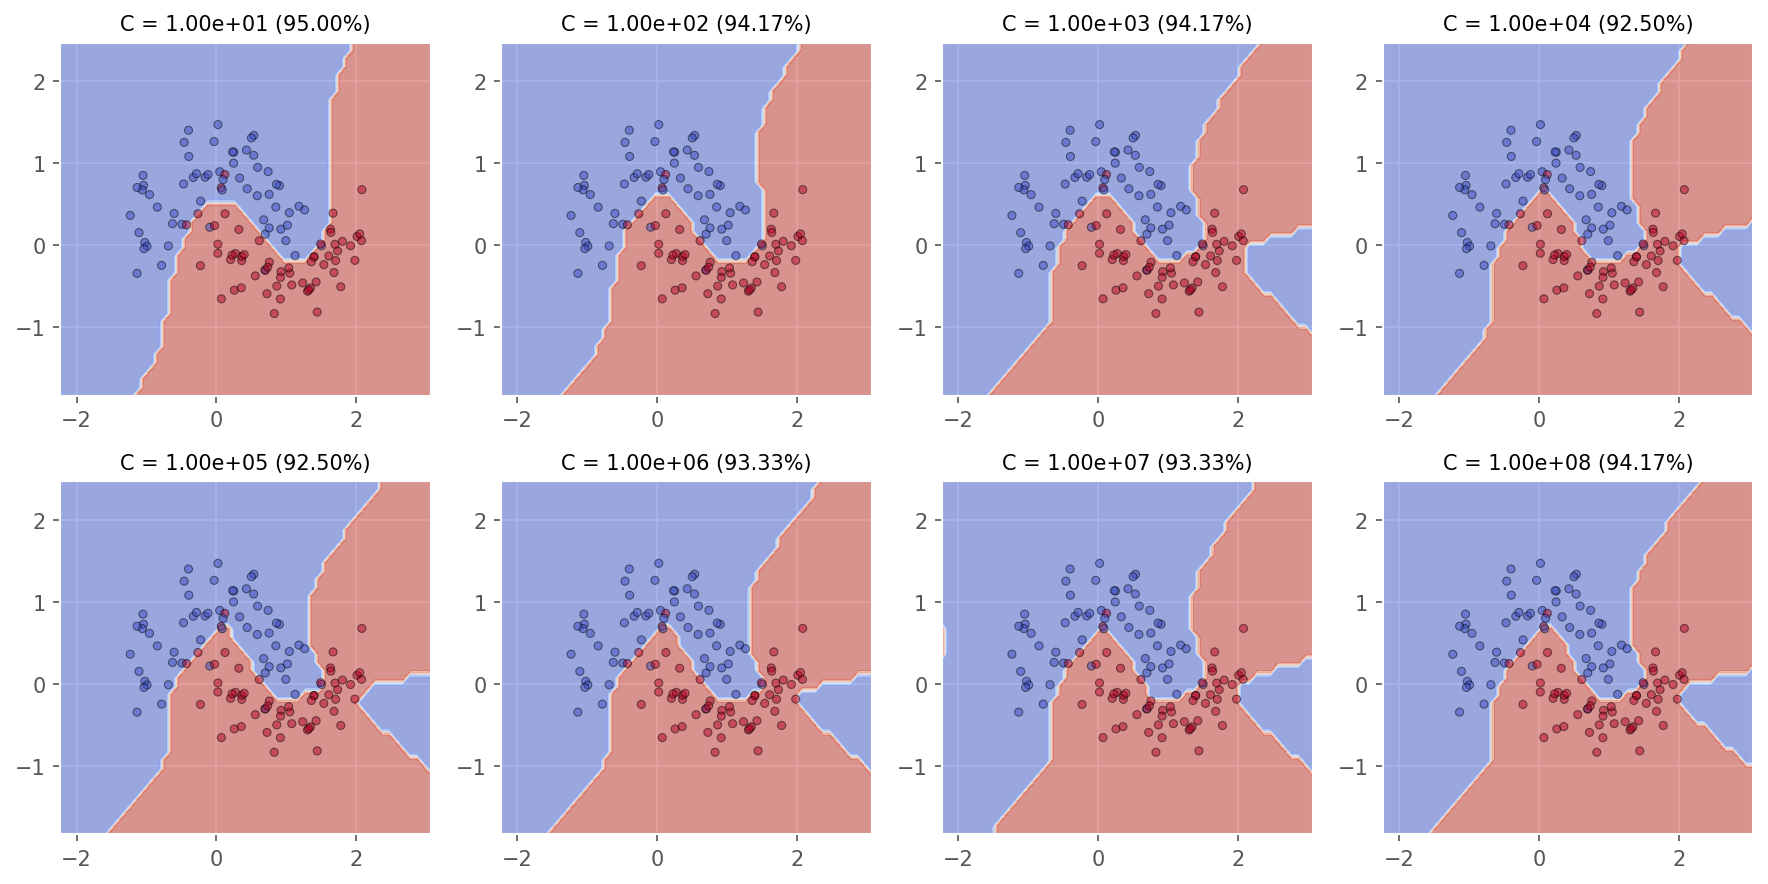

In [57]:
degree = 7
coeffs = [1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8]

plt.figure()

for C in coeffs:
    # create logistic regression classifier
    plt.subplot(2, 4, coeffs.index(C) + 1)
    plt.tight_layout()
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    log_reg = LogisticRegression(C=C)
    model = Pipeline([("poly_features", poly_features), ("logistic_regression", log_reg)])
    
    # train classifier
    model.fit(X, y)
    accuracy = model.score(X, y)
    
    # plot classification results
    title = "C = {:.2e} ({:.2f}%)"
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], s=15, c=y, alpha=0.5, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title.format(C, accuracy * 100), fontsize=10)

plt.show()


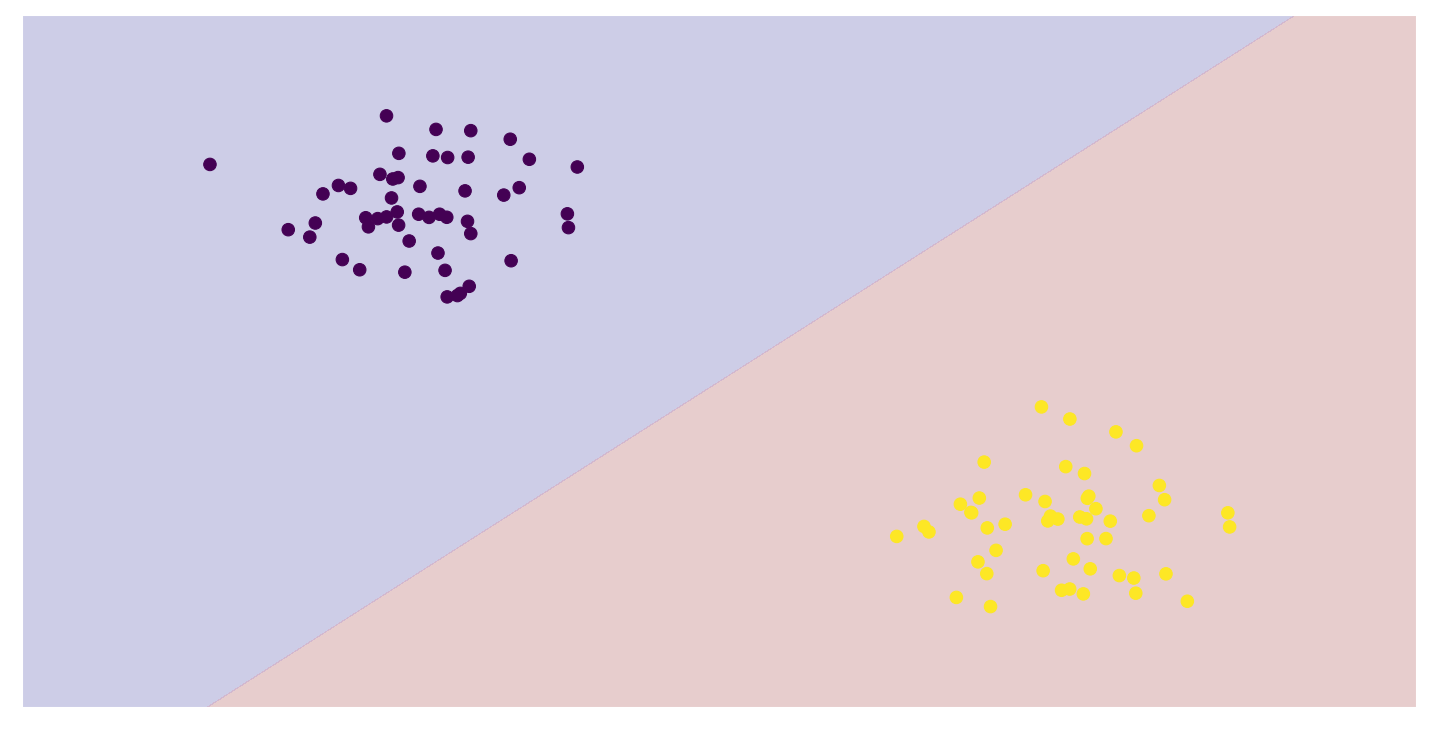

In [58]:
import numpy as np
import matplotlib.pyplot as plt


def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None):
    if eps is None:
        eps = X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, colors=['blue', 'red'], alpha=0.1)
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())


if __name__ == '__main__':
    from sklearn.datasets import make_blobs
    from sklearn.linear_model import LogisticRegression
    X, y = make_blobs(centers=2, random_state=42)
    clf = LogisticRegression().fit(X, y)
    plot_2d_separator(clf, X, fill=True)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

In [62]:
import pandas as pd

In [63]:
boston = pd.read_csv('C:/Users/HP/OneDrive/Desktop/datasets/boston.csv')
boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [64]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [71]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [90]:
#X = boston.drop('target', axis=1)  # Features (drop the target column)
#y = boston['target']  # Target variable


## Extract the feature data
X = boston.drop(columns=['MEDV']) #----> x=506records*12feature  ???
y = boston['MEDV']



In [92]:
X
# how understand the meaning of the values in X
#why i have array with 30 value???

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [85]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [77]:
import numpy as np

feature_values = np.array([0.02, 0.07, 0.09, 0.12, 0.14, 0.38, 0.41, 0.42, 0.44, 0.46, 0.52, 0.53, 0.54, 0.55, 0.57, 0.6, 0.64, 0.65, 0.72, 0.78, 0.78, 0.79, 0.8, 0.83, 0.87, 0.89, 0.93, 0.94, 0.96, 0.98])
feature_names = boston.columns[:-1]  # Exclude the target column

for name, value in zip(feature_names, feature_values):
    print(f"{name}: {value}")


CRIM: 0.02
ZN: 0.07
INDUS: 0.09
CHAS: 0.12
NOX: 0.14
RM: 0.38
AGE: 0.41
DIS: 0.42
RAD: 0.44
TAX: 0.46
PTRATIO: 0.52
B: 0.53
LSTAT: 0.54


In [ ]:
# all 506 sample and feature 1 va 2
new_x=boston.data[:,[1,2]]


In [79]:
import pandas as pd

boston = pd.read_csv('C:/Users/HP/OneDrive/Desktop/datasets/boston.csv')
feature_values = boston.drop('MEDV', axis=1).values

for name, value in zip(boston.columns[:-1], feature_values.T):
    print(f"{name}: {value}")

CRIM: [6.32e-03 2.73e-02 2.73e-02 3.24e-02 6.91e-02 2.99e-02 8.83e-02 1.45e-01 2.11e-01 1.70e-01 2.25e-01
 1.17e-01 9.38e-02 6.30e-01 6.38e-01 6.27e-01 1.05e+00 7.84e-01 8.03e-01 7.26e-01 1.25e+00 8.52e-01
 1.23e+00 9.88e-01 7.50e-01 8.41e-01 6.72e-01 9.56e-01 7.73e-01 1.00e+00 1.13e+00 1.35e+00 1.39e+00
 1.15e+00 1.61e+00 6.42e-02 9.74e-02 8.01e-02 1.75e-01 2.76e-02 3.36e-02 1.27e-01 1.41e-01 1.59e-01
 1.23e-01 1.71e-01 1.88e-01 2.29e-01 2.54e-01 2.20e-01 8.87e-02 4.34e-02 5.36e-02 4.98e-02 1.36e-02
 1.31e-02 2.05e-02 1.43e-02 1.54e-01 1.03e-01 1.49e-01 1.72e-01 1.10e-01 1.27e-01 1.95e-02 3.58e-02
 4.38e-02 5.79e-02 1.36e-01 1.28e-01 8.83e-02 1.59e-01 9.16e-02 1.95e-01 7.90e-02 9.51e-02 1.02e-01
 8.71e-02 5.65e-02 8.39e-02 4.11e-02 4.46e-02 3.66e-02 3.55e-02 5.06e-02 5.73e-02 5.19e-02 7.15e-02
 5.66e-02 5.30e-02 4.68e-02 3.93e-02 4.20e-02 2.88e-02 4.29e-02 1.22e-01 1.15e-01 1.21e-01 8.19e-02
 6.86e-02 1.49e-01 1.14e-01 2.29e-01 2.12e-01 1.40e-01 1.33e-01 1.71e-01 1.31e-01 1.28e-01 2.6

In [81]:
# find value of ['NOX']
boston['NOX'].unique().tolist()

[0.538,
 0.469,
 0.458,
 0.524,
 0.499,
 0.428,
 0.448,
 0.439,
 0.41,
 0.403,
 0.411,
 0.453,
 0.4161,
 0.398,
 0.409,
 0.413,
 0.437,
 0.426,
 0.449,
 0.489,
 0.464,
 0.445,
 0.52,
 0.547,
 0.581,
 0.624,
 0.871,
 0.605,
 0.51,
 0.488,
 0.401,
 0.422,
 0.404,
 0.415,
 0.55,
 0.507,
 0.504,
 0.431,
 0.392,
 0.394,
 0.647,
 0.575,
 0.447,
 0.4429,
 0.4,
 0.389,
 0.385,
 0.405,
 0.433,
 0.472,
 0.544,
 0.493,
 0.46,
 0.4379,
 0.515,
 0.442,
 0.518,
 0.484,
 0.429,
 0.435,
 0.77,
 0.718,
 0.631,
 0.668,
 0.671,
 0.7,
 0.693,
 0.659,
 0.597,
 0.679,
 0.614,
 0.584,
 0.713,
 0.74,
 0.655,
 0.58,
 0.532,
 0.583,
 0.609,
 0.585,
 0.573]

In [75]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the Boston Housing dataset
#X = boston.drop('target', axis=1)  # Features (drop the target column)
#y = boston['target']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform Polynomial Regression with Ridge regularization
degree = 2
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_poly, y_train)

# Evaluate the model
y_pred = ridge.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 13.170240315171933
